# NETWORK ANALYSIS

---
### Imports

In [1]:
import networkx as nx
import numpy as np
import torch
from tqdm import tqdm
import torch.nn.functional as F
import torchmetrics
import matplotlib.pyplot as plt
import os 
from abc import ABC, abstractmethod
import random
from sklearn.metrics import precision_score, recall_score, accuracy_score, mean_absolute_error
from collections import Counter

---
### Question 1

### Question 2

In [2]:
caltech = nx.read_gml(r"./fb100/data/Caltech36.gml")
jhopkins = nx.read_gml(r"./fb100/data/Johns Hopkins55.gml")
mit = nx.read_gml(r"./fb100/data/MIT8.gml")

#### Question 2.A

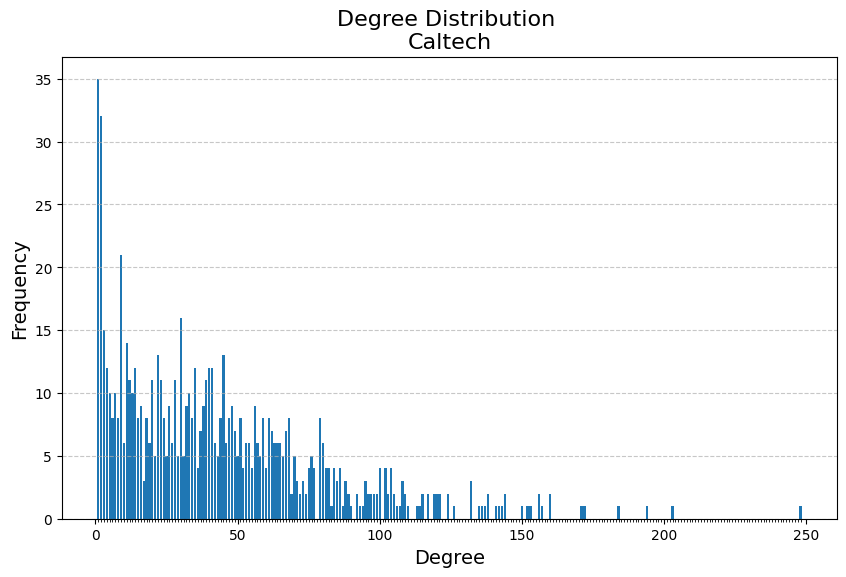

In [3]:
degrees = [degree for _, degree in caltech.degree()]
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=range(min(degrees), max(degrees) + 2), align='left', rwidth=0.8)
plt.title("Degree Distribution \nCaltech", fontsize=16)
plt.xlabel("Degree", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(min(degrees), max(degrees) + 1), minor=True)
plt.show()

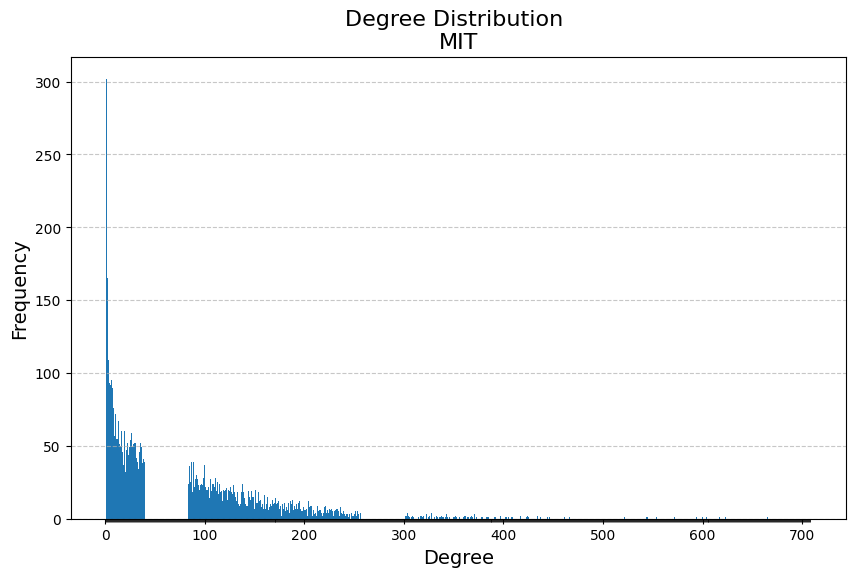

In [4]:
degrees = [degree for _, degree in mit.degree()]
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=range(min(degrees), max(degrees) + 2), align='left', rwidth=0.8)
plt.title("Degree Distribution \nMIT", fontsize=16)
plt.xlabel("Degree", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(min(degrees), max(degrees) + 1), minor=True)
plt.show()


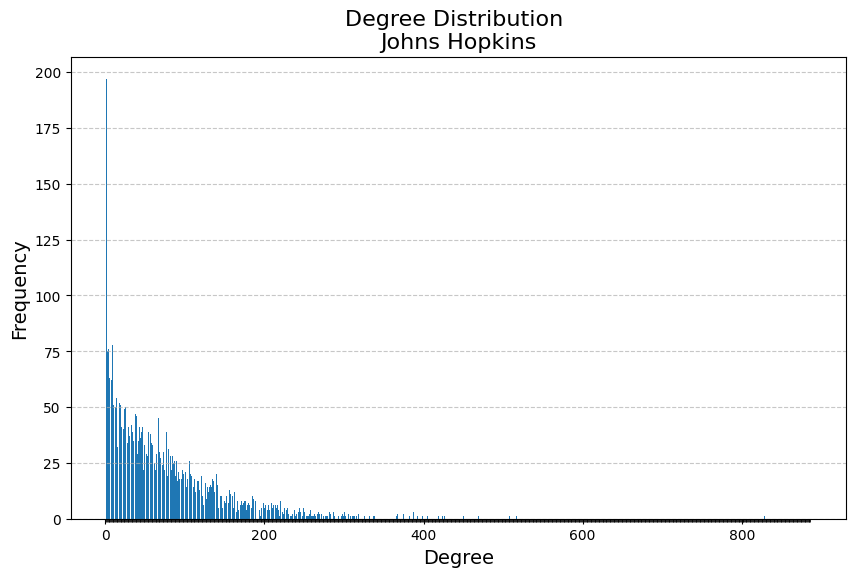

In [5]:
degrees = [degree for _, degree in jhopkins.degree()]
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=range(min(degrees), max(degrees) + 2), align='left', rwidth=0.8)
plt.title("Degree Distribution \nJohns Hopkins", fontsize=16)
plt.xlabel("Degree", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(min(degrees), max(degrees) + 1), minor=True)
plt.show()

#### Question 2.B

In [6]:
global_clustering_c = nx.transitivity(caltech)
mean_local_clustering_c = nx.average_clustering(caltech)
edge_density_c = nx.density(caltech)
print(f"Caltech :")
print(f"- Global Clustering Coefficient: {global_clustering_c:.4f}")
print(f"- Mean Local Clustering Coefficient: {mean_local_clustering_c:.4f}")
print(f"- Edge Density: {edge_density_c:.4f}")

Caltech :
- Global Clustering Coefficient: 0.2913
- Mean Local Clustering Coefficient: 0.4093
- Edge Density: 0.0564


In [7]:
global_clustering_m = nx.transitivity(mit)
mean_local_clustering_m = nx.average_clustering(mit)
edge_density_m = nx.density(mit)
print(f"MIT :")
print(f"- Global Clustering Coefficient: {global_clustering_m:.4f}-")
print(f"- Mean Local Clustering Coefficient: {mean_local_clustering_m:.4f}")
print(f"- Edge Density: {edge_density_m:.4f}\n")

MIT :
- Global Clustering Coefficient: 0.1803-
- Mean Local Clustering Coefficient: 0.2712
- Edge Density: 0.0121



In [8]:
global_clustering_j = nx.transitivity(jhopkins)
mean_local_clustering_j = nx.average_clustering(jhopkins)
edge_density_j = nx.density(jhopkins)
print(f"Johns Hopkins :")
print(f"- Global Clustering Coefficient: {global_clustering_j:.4f}")
print(f"- Mean Local Clustering Coefficient: {mean_local_clustering_j:.4f}")
print(f"- Edge Density: {edge_density_j:.4f}\n")

Johns Hopkins :
- Global Clustering Coefficient: 0.1932
- Mean Local Clustering Coefficient: 0.2684
- Edge Density: 0.0139



#### Question 2.C

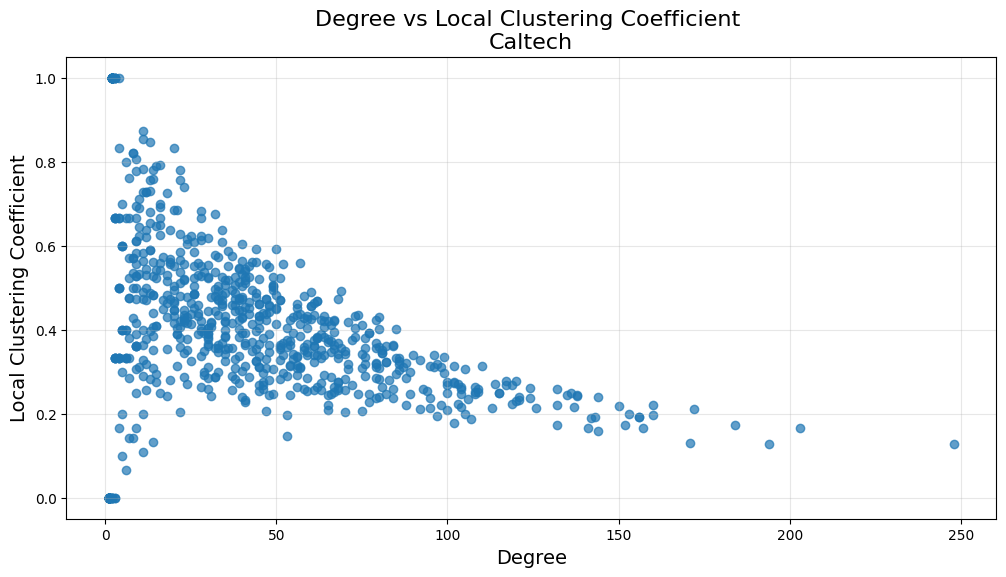

In [9]:
degrees = dict(caltech.degree())  
local_clustering = nx.clustering(caltech)  
x = list(degrees.values())  
y = list(local_clustering.values()) 
plt.figure(figsize=(12, 6))
plt.scatter(x, y, alpha=0.7)
plt.title("Degree vs Local Clustering Coefficient \nCaltech", fontsize=16)
plt.xlabel("Degree", fontsize=14)
plt.ylabel("Local Clustering Coefficient", fontsize=14)
plt.grid(alpha=0.3)
plt.show()

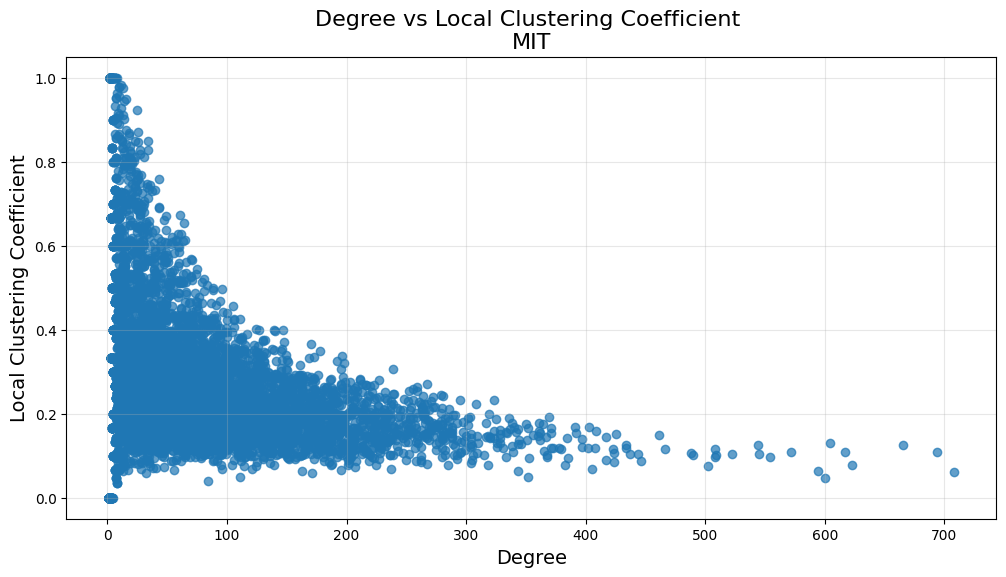

In [10]:
degrees = dict(mit.degree())  
local_clustering = nx.clustering(mit)  
x = list(degrees.values())  
y = list(local_clustering.values()) 
plt.figure(figsize=(12, 6))
plt.scatter(x, y, alpha=0.7)
plt.title("Degree vs Local Clustering Coefficient \nMIT", fontsize=16)
plt.xlabel("Degree", fontsize=14)
plt.ylabel("Local Clustering Coefficient", fontsize=14)
plt.grid(alpha=0.3)
plt.show()


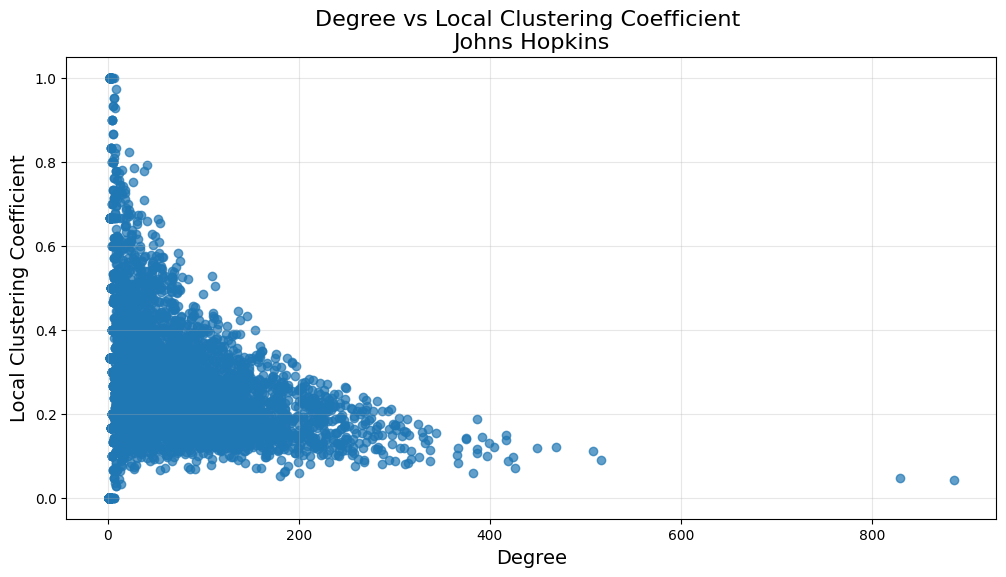

In [11]:
degrees = dict(jhopkins.degree())  
local_clustering = nx.clustering(jhopkins)  
x = list(degrees.values())  
y = list(local_clustering.values()) 
plt.figure(figsize=(12, 6))
plt.scatter(x, y, alpha=0.7)
plt.title("Degree vs Local Clustering Coefficient \nJohns Hopkins", fontsize=16)
plt.xlabel("Degree", fontsize=14)
plt.ylabel("Local Clustering Coefficient", fontsize=14)
plt.grid(alpha=0.3)
plt.show()

### Question 3

#### Question 3.A

In [12]:
data = "fb100/data"
attributes = ["student_fac", "dorm", "gender", "major_index"] 
results = {attr: {"sizes": [], "assortativity": []} for attr in attributes}
results["degree"] = {"sizes": [], "assortativity": []}

files = [f for f in os.listdir(data) if f.endswith(".gml")]
files = files[:50]

for gml_file in tqdm(files, desc="Processing GML files"):
    graph_path = os.path.join(data, gml_file)
    graph = nx.read_gml(graph_path)
    n = len(graph)
    for attr in attributes:
        if nx.get_node_attributes(graph, attr): 
            assortativity = nx.attribute_assortativity_coefficient(graph, attr)
            results[attr]["sizes"].append(n)
            results[attr]["assortativity"].append(assortativity)
    degree_assortativity = nx.degree_assortativity_coefficient(graph)
    results["degree"]["sizes"].append(n)
    results["degree"]["assortativity"].append(degree_assortativity)


Processing GML files: 100%|██████████| 50/50 [20:33<00:00, 24.67s/it]


In [13]:
def plot_scatter_and_distribution(results, attr):
    sizes = results[attr]["sizes"]
    assortativity = results[attr]["assortativity"]

    plt.figure(figsize=(12, 8))
    plt.scatter(sizes, assortativity, alpha=0.7)
    plt.xscale("log")
    plt.axhline(0, linestyle="--", color='r', label="No Assortativity")
    plt.title(f"Assortativity vs Network Size ({attr.replace('_', ' ').capitalize()})", fontsize=16)
    plt.xlabel("Network Size (n)", fontsize=14)
    plt.ylabel("Assortativity", fontsize=14)
    plt.grid(alpha=0.3)
    plt.legend()
    plt.show()

    plt.figure(figsize=(12, 8))
    plt.hist(assortativity, bins=20, alpha=0.7, )
    plt.axvline(0, linestyle="--", color='r', label="No Assortativity")
    plt.title(f"Distribution of Assortativity ({attr.replace('_', ' ').capitalize()})", fontsize=16)
    plt.xlabel("Assortativity", fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.grid(alpha=0.3)
    plt.legend()
    plt.show()

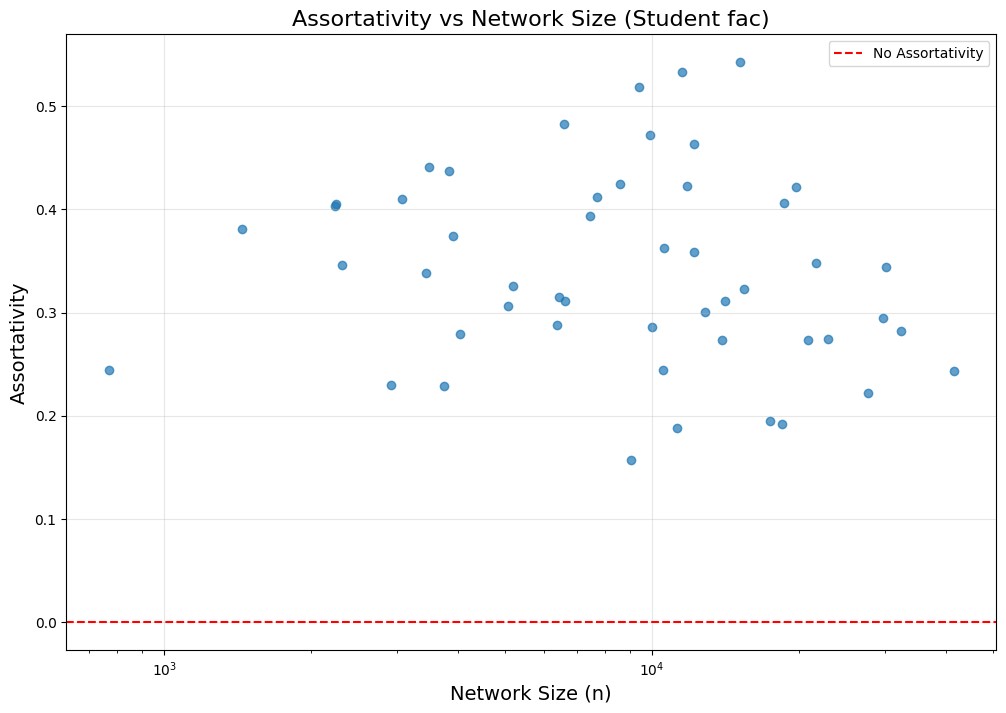

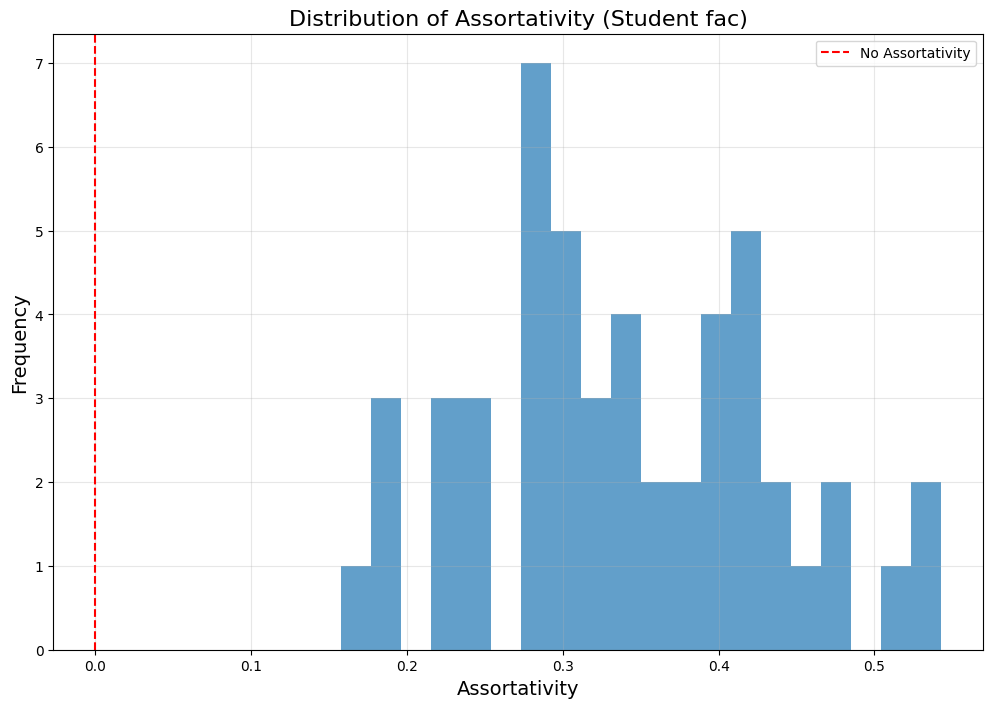

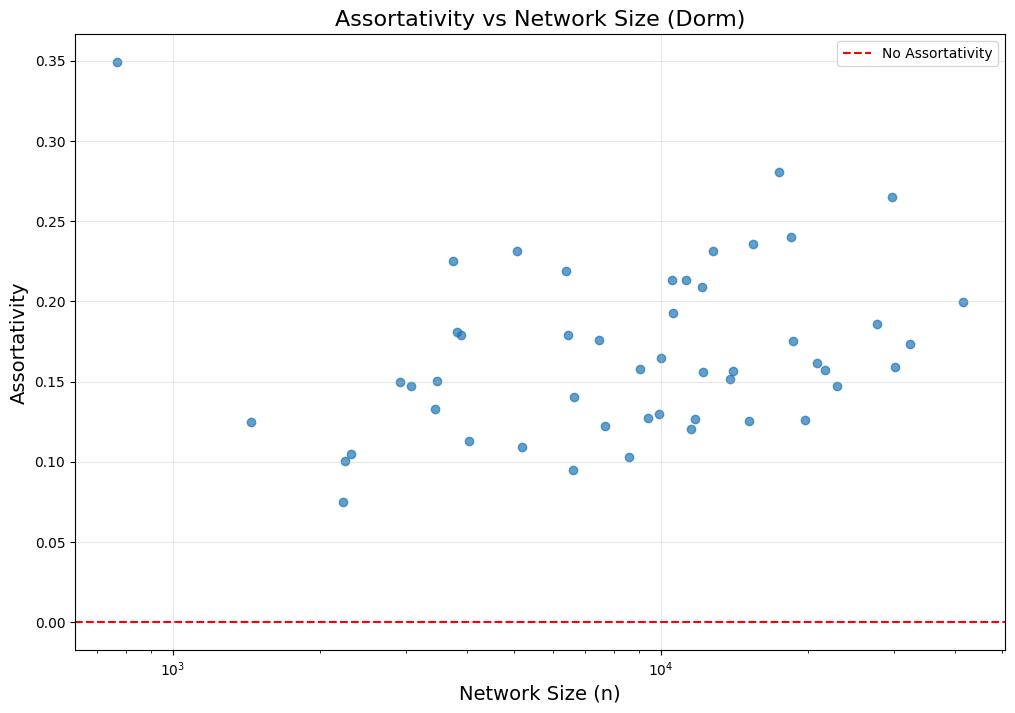

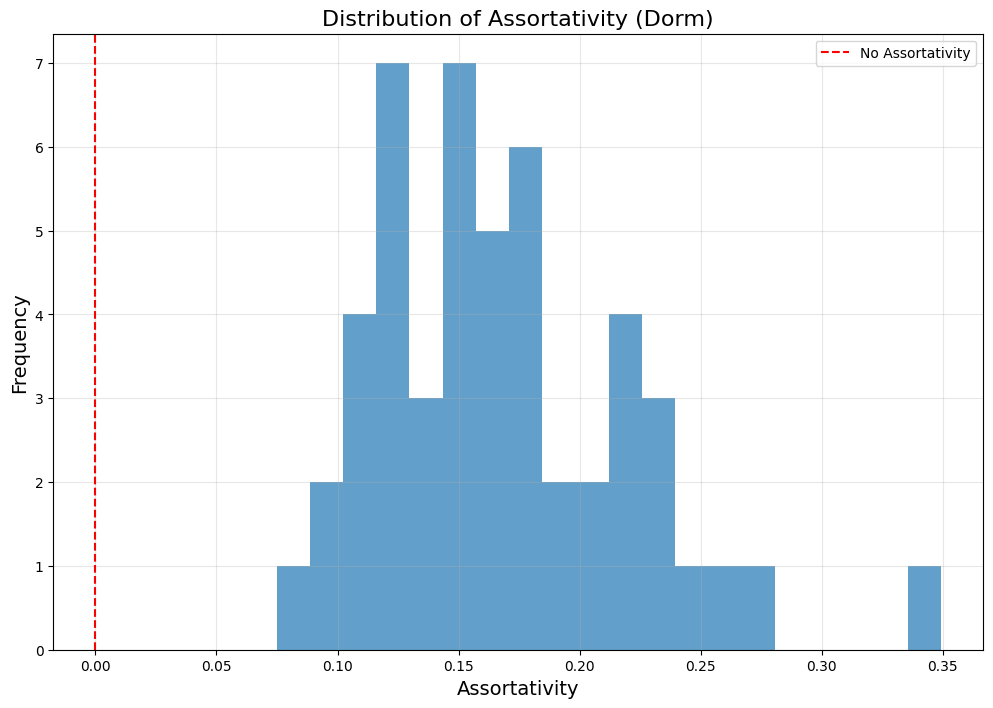

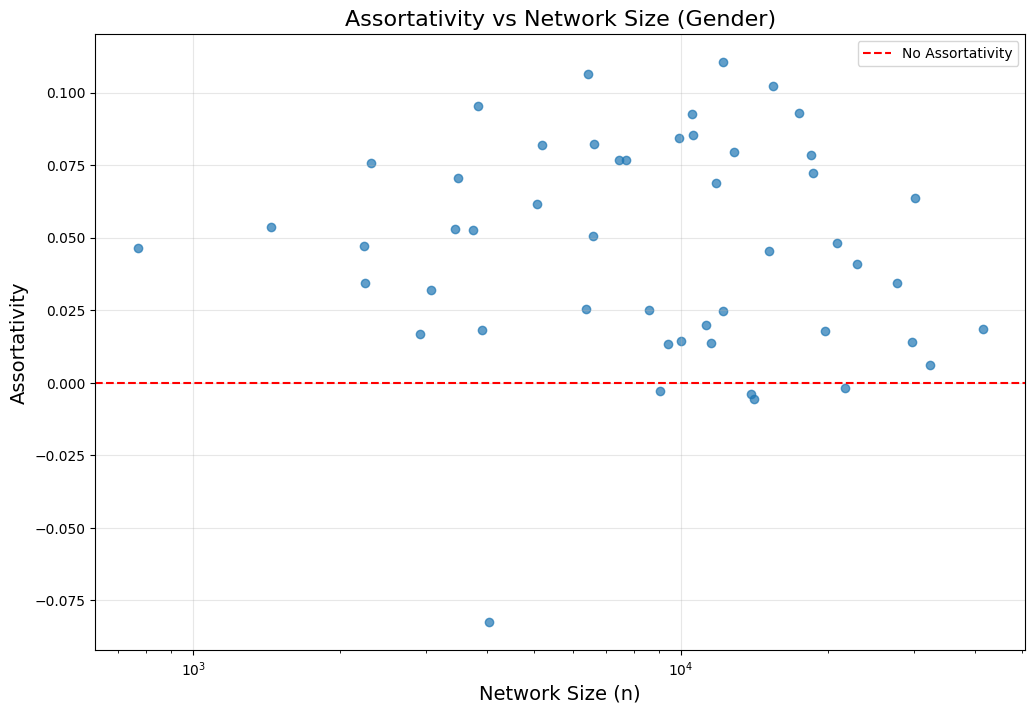

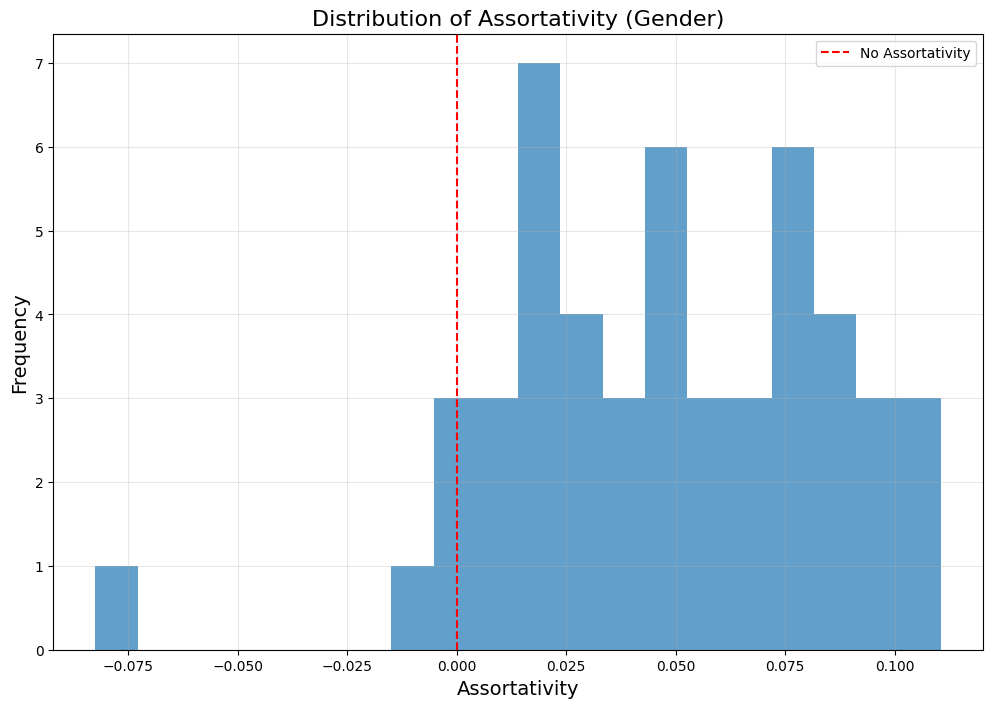

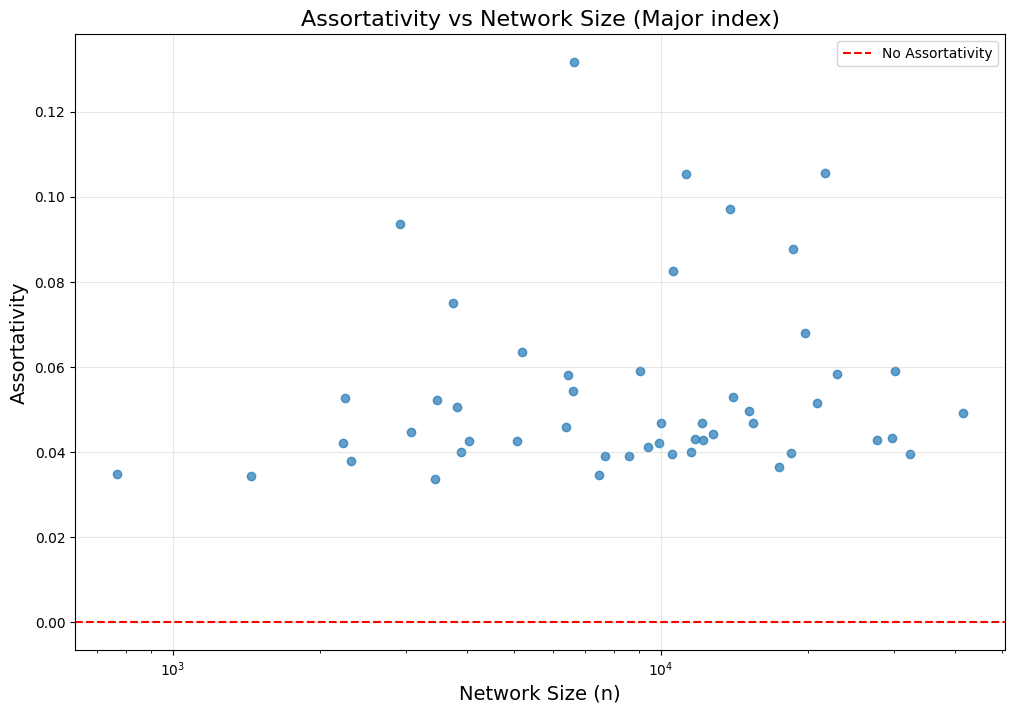

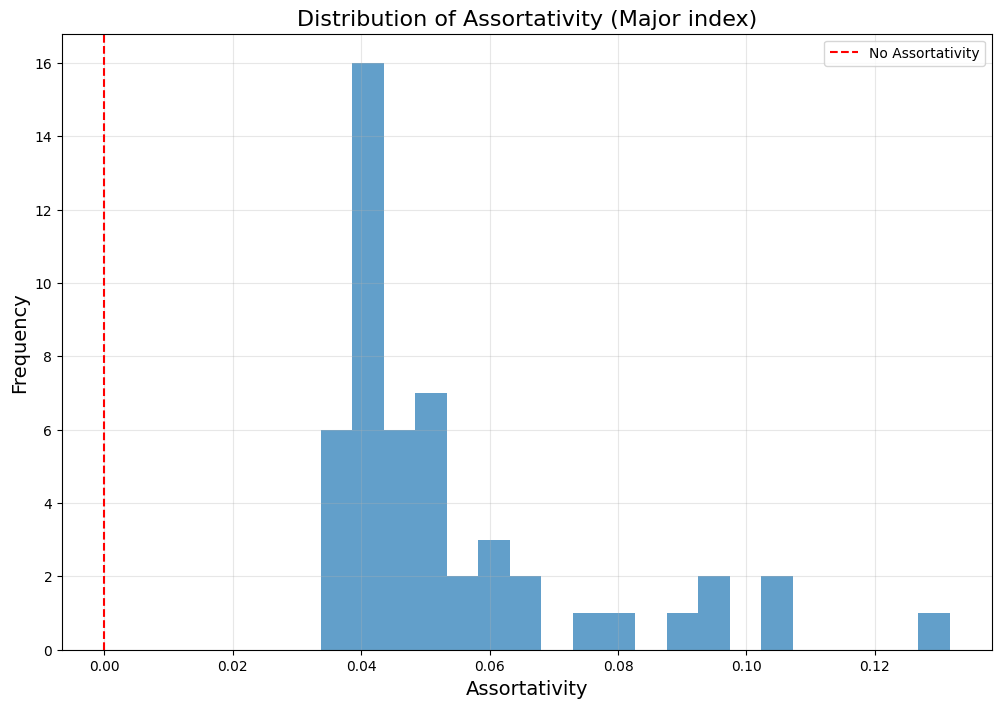

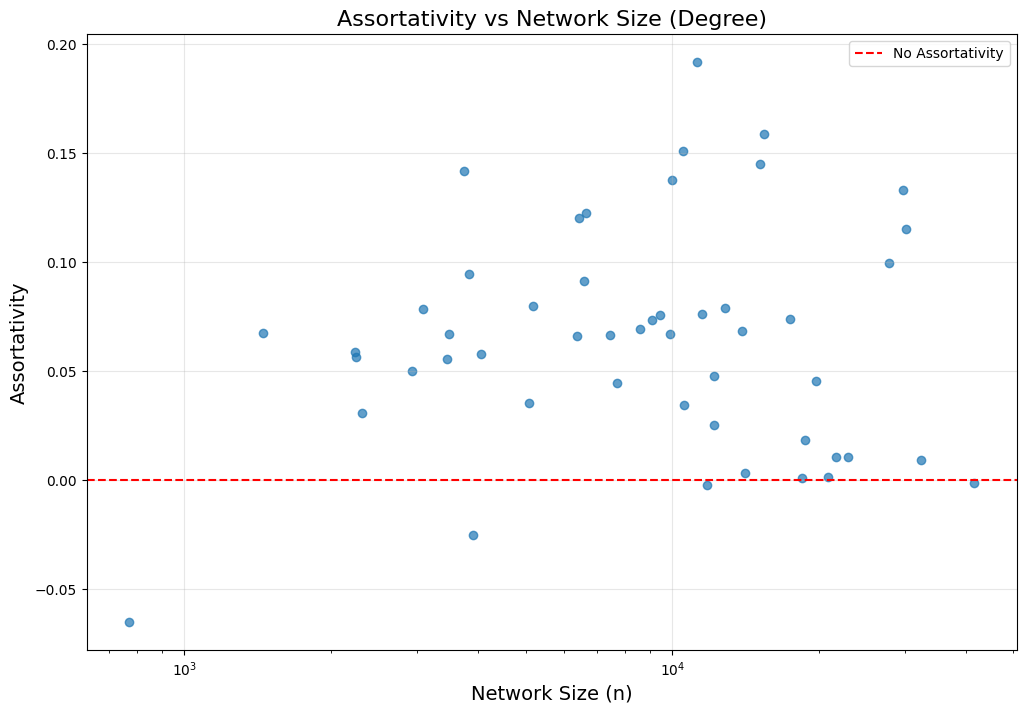

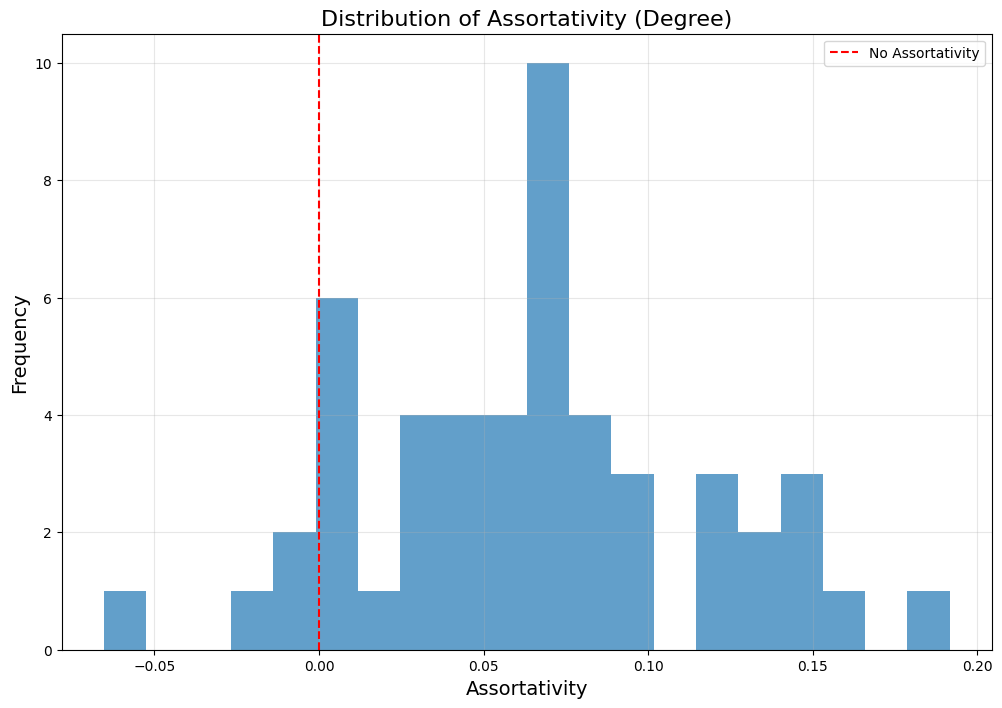

In [14]:
for attr in attributes + ["degree"]:
    plot_scatter_and_distribution(results, attr)

## Question 4

In [15]:
class LinkPrediction(ABC):
    def __init__(self, graph):
        self.graph = graph
    
    def neighbors(self, v):
        return set(self.graph.neighbors(v))
    
    @abstractmethod
    def predict(self, u, v):
        pass

class CommonNeighbors(LinkPrediction):
    def predict(self, u, v):
        return len(self.neighbors(u) & self.neighbors(v))

class JaccardCoefficient(LinkPrediction):
    def predict(self, u, v):
        union_size = len(self.neighbors(u) | self.neighbors(v))
        return len(self.neighbors(u) & self.neighbors(v)) / union_size if union_size > 0 else 0

class AdamicAdar(LinkPrediction):
    def predict(self, u, v):
        return sum(1 / np.log(len(self.neighbors(w))) for w in self.neighbors(u) & self.neighbors(v) if len(self.neighbors(w)) > 1)

#### Common Neighbors

In [16]:
for name, G in zip(['Caltech', 'Hopkins', 'MIT'],[caltech, jhopkins, mit]):
    print(name)
    for f in [0.05, 0.1, 0.15, 0.2]:
        print(f"percentage removed {f*100:.0f}%")
        edges = list(G.edges())
        random.shuffle(edges)
        removed_edges = edges[:int(f * len(edges))]
        G.remove_edges_from(removed_edges)
        
        predictor = CommonNeighbors(G)
        predictions = [(u, v, predictor.predict(u, v)) for u, v in removed_edges]
        predictions.sort(key=lambda x: x[2], reverse=True)
        
        k_values = [50, 100, 200, 400]
        for k in k_values:
            top_k_predictions = {e[:2] for e in predictions[:k]}
            removed_set = set(removed_edges)
            tp = len(top_k_predictions & removed_set)
            precision = tp / k
            recall = tp / len(removed_set)
            print(f"k={k}: Precision={precision:.4f}, Recall={recall:.4f}")
    print()

Caltech
percentage removed 5%
k=50: Precision=1.0000, Recall=0.0601
k=100: Precision=1.0000, Recall=0.1202
k=200: Precision=1.0000, Recall=0.2404
k=400: Precision=1.0000, Recall=0.4808
percentage removed 10%
k=50: Precision=1.0000, Recall=0.0316
k=100: Precision=1.0000, Recall=0.0632
k=200: Precision=1.0000, Recall=0.1264
k=400: Precision=1.0000, Recall=0.2528
percentage removed 15%
k=50: Precision=1.0000, Recall=0.0234
k=100: Precision=1.0000, Recall=0.0468
k=200: Precision=1.0000, Recall=0.0936
k=400: Precision=1.0000, Recall=0.1873
percentage removed 20%
k=50: Precision=1.0000, Recall=0.0207
k=100: Precision=1.0000, Recall=0.0413
k=200: Precision=1.0000, Recall=0.0826
k=400: Precision=1.0000, Recall=0.1652

Hopkins
percentage removed 5%
k=50: Precision=1.0000, Recall=0.0054
k=100: Precision=1.0000, Recall=0.0107
k=200: Precision=1.0000, Recall=0.0214
k=400: Precision=1.0000, Recall=0.0429
percentage removed 10%
k=50: Precision=1.0000, Recall=0.0028
k=100: Precision=1.0000, Recall=0.

#### Jaccard Coefficient

In [17]:
for name, G in zip(['Caltech', 'Hopkins', 'MIT'],[caltech, jhopkins, mit]):
    print(name)
    for f in [0.05, 0.1, 0.15, 0.2]:
        print(f"percentage removed {f*100:.0f}%")
        edges = list(G.edges())
        random.shuffle(edges)
        removed_edges = edges[:int(f * len(edges))]
        G.remove_edges_from(removed_edges)
        
        predictor = JaccardCoefficient(G)
        predictions = [(u, v, predictor.predict(u, v)) for u, v in removed_edges]
        predictions.sort(key=lambda x: x[2], reverse=True)
        
        k_values = [50, 100, 200, 400]
        for k in k_values:
            top_k_predictions = {e[:2] for e in predictions[:k]}
            removed_set = set(removed_edges)
            tp = len(top_k_predictions & removed_set)
            precision = tp / k
            recall = tp / len(removed_set)
            print(f"k={k}: Precision={precision:.4f}, Recall={recall:.4f}")
    print()

Caltech
percentage removed 5%
k=50: Precision=1.0000, Recall=0.1033
k=100: Precision=1.0000, Recall=0.2066
k=200: Precision=1.0000, Recall=0.4132
k=400: Precision=1.0000, Recall=0.8264
percentage removed 10%
k=50: Precision=1.0000, Recall=0.0543
k=100: Precision=1.0000, Recall=0.1087
k=200: Precision=1.0000, Recall=0.2174
k=400: Precision=1.0000, Recall=0.4348
percentage removed 15%
k=50: Precision=1.0000, Recall=0.0403
k=100: Precision=1.0000, Recall=0.0805
k=200: Precision=1.0000, Recall=0.1610
k=400: Precision=1.0000, Recall=0.3221
percentage removed 20%
k=50: Precision=1.0000, Recall=0.0355
k=100: Precision=1.0000, Recall=0.0711
k=200: Precision=1.0000, Recall=0.1421
k=400: Precision=1.0000, Recall=0.2843

Hopkins
percentage removed 5%
k=50: Precision=1.0000, Recall=0.0092
k=100: Precision=1.0000, Recall=0.0184
k=200: Precision=1.0000, Recall=0.0369
k=400: Precision=1.0000, Recall=0.0737
percentage removed 10%
k=50: Precision=1.0000, Recall=0.0049
k=100: Precision=1.0000, Recall=0.

#### AdamicAdar

In [18]:
for name, G in zip(['Caltech', 'Hopkins', 'MIT'],[caltech, jhopkins, mit]):
    print(name)
    for f in [0.05, 0.1, 0.15, 0.2]:
        print(f"percentage removed {f*100:.0f}%")
        edges = list(G.edges())
        random.shuffle(edges)
        removed_edges = edges[:int(f * len(edges))]
        G.remove_edges_from(removed_edges)
        
        predictor = AdamicAdar(G)
        predictions = [(u, v, predictor.predict(u, v)) for u, v in removed_edges]
        predictions.sort(key=lambda x: x[2], reverse=True)
        
        k_values = [50, 100, 200, 400]
        for k in k_values:
            top_k_predictions = {e[:2] for e in predictions[:k]}
            removed_set = set(removed_edges)
            tp = len(top_k_predictions & removed_set)
            precision = tp / k
            recall = tp / len(removed_set)
            print(f"k={k}: Precision={precision:.4f}, Recall={recall:.4f}")
    print()

Caltech
percentage removed 5%
k=50: Precision=1.0000, Recall=0.1779
k=100: Precision=1.0000, Recall=0.3559
k=200: Precision=1.0000, Recall=0.7117
k=400: Precision=0.7025, Recall=1.0000
percentage removed 10%
k=50: Precision=1.0000, Recall=0.0935
k=100: Precision=1.0000, Recall=0.1869
k=200: Precision=1.0000, Recall=0.3738
k=400: Precision=1.0000, Recall=0.7477
percentage removed 15%
k=50: Precision=1.0000, Recall=0.0693
k=100: Precision=1.0000, Recall=0.1385
k=200: Precision=1.0000, Recall=0.2770
k=400: Precision=1.0000, Recall=0.5540
percentage removed 20%
k=50: Precision=1.0000, Recall=0.0611
k=100: Precision=1.0000, Recall=0.1222
k=200: Precision=1.0000, Recall=0.2445
k=400: Precision=1.0000, Recall=0.4890

Hopkins
percentage removed 5%
k=50: Precision=1.0000, Recall=0.0159
k=100: Precision=1.0000, Recall=0.0317
k=200: Precision=1.0000, Recall=0.0634
k=400: Precision=1.0000, Recall=0.1269
percentage removed 10%
k=50: Precision=1.0000, Recall=0.0083
k=100: Precision=1.0000, Recall=0.

## Question 5
### Question 5.A 
### Question 5.B

In [19]:
class LabelPropagation:
    def __init__(self, graph, attribute, max_iter=100):
        self.graph = graph
        self.attribute = attribute
        self.max_iter = max_iter
        self.labels = nx.get_node_attributes(graph, attribute)
        self.missing_nodes = [node for node in graph.nodes() if node not in self.labels]

    def propagate(self):
        for _ in range(self.max_iter):
            new_labels = self.labels.copy()
            for node in self.missing_nodes:
                neighbors = list(self.graph.neighbors(node))
                if neighbors:
                    neighbor_labels = [self.labels[neighbor] for neighbor in neighbors if neighbor in self.labels]
                    if neighbor_labels:
                        new_labels[node] = Counter(neighbor_labels).most_common(1)[0][0] 
            self.labels = new_labels

    def get_labels(self):
        return self.labels


def evaluate_label_propagation(graph, attribute, fractions):
    results = {fraction: {"mae": [], "accuracy": []} for fraction in fractions}
    
    for fraction in tqdm(fractions, desc="Evaluating fractions"):
        for _ in range(10):  # Run multiple iterations for averaging
            graph_copy = graph.copy()
            labels = nx.get_node_attributes(graph_copy, attribute)
            
            all_nodes = list(graph_copy.nodes())
            num_to_remove = int(fraction * len(all_nodes))
            if num_to_remove == 0:
                continue  
            
            missing_nodes = np.random.choice(all_nodes, num_to_remove, replace=False)
            
            for node in missing_nodes:
                labels.pop(node, None)
            nx.set_node_attributes(graph_copy, labels, attribute)
            
            lp = LabelPropagation(graph_copy, attribute)
            lp.propagate()
            recovered_labels = lp.get_labels()

            true_labels = nx.get_node_attributes(graph, attribute)
            predicted_labels = {node: recovered_labels.get(node, None) for node in missing_nodes if node in recovered_labels}
            true_labels = {node: true_labels[node] for node in missing_nodes if node in true_labels}
            
            if not true_labels or not predicted_labels:
                continue

            accuracy = accuracy_score(list(true_labels.values()), list(predicted_labels.values()))
            mae = mean_absolute_error(list(true_labels.values()), list(predicted_labels.values()))

            results[fraction]["accuracy"].append(accuracy)
            results[fraction]["mae"].append(mae)

    return results

### Question 5.C and 5.D

In [22]:
attributes = ["dorm", "major_index", "gender"]
fractions = [0.1, 0.2, 0.3]

files = [f for f in os.listdir(data) if f.endswith(".gml")][:10]

for gml_file in tqdm(files, desc="Processing GML files"):
    graph_path = os.path.join(data, gml_file)
    graph = nx.read_gml(graph_path)
    
    for attribute in attributes:
        if nx.get_node_attributes(graph, attribute):  
            results = evaluate_label_propagation(graph, attribute, fractions)
            print(f"Results for {gml_file} - {attribute}:")
            
            for fraction in fractions:
                if results[fraction]["accuracy"]:  
                    accuracy = np.mean(results[fraction]["accuracy"])
                    mae = np.mean(results[fraction]["mae"])
                    print(f"  Fraction: {fraction} - Accuracy: {accuracy:.4f} - MAE: {mae:.4f}")
                else:
                    print(f"  Fraction: {fraction} - No valid results")


Evaluating fractions: 100%|██████████| 3/3 [00:18<00:00,  6.03s/it]


Results for American75.gml - dorm:
  Fraction: 0.1 - Accuracy: 1.0000 - MAE: 0.0000
  Fraction: 0.2 - Accuracy: 1.0000 - MAE: 0.0000
  Fraction: 0.3 - Accuracy: 1.0000 - MAE: 0.0000



Processing GML files:  10%|█         | 1/10 [00:47<07:09, 47.72s/it]

Results for American75.gml - gender:
  Fraction: 0.1 - Accuracy: 1.0000 - MAE: 0.0000
  Fraction: 0.2 - Accuracy: 1.0000 - MAE: 0.0000
  Fraction: 0.3 - Accuracy: 1.0000 - MAE: 0.0000



Evaluating fractions: 100%|██████████| 3/3 [00:06<00:00,  2.33s/it]


Results for Amherst41.gml - dorm:
  Fraction: 0.1 - Accuracy: 1.0000 - MAE: 0.0000
  Fraction: 0.2 - Accuracy: 1.0000 - MAE: 0.0000
  Fraction: 0.3 - Accuracy: 1.0000 - MAE: 0.0000



Processing GML files:  20%|██        | 2/10 [01:04<03:57, 29.68s/it]

Results for Amherst41.gml - gender:
  Fraction: 0.1 - Accuracy: 1.0000 - MAE: 0.0000
  Fraction: 0.2 - Accuracy: 1.0000 - MAE: 0.0000
  Fraction: 0.3 - Accuracy: 1.0000 - MAE: 0.0000



Evaluating fractions: 100%|██████████| 3/3 [01:32<00:00, 30.78s/it]


Results for Auburn71.gml - dorm:
  Fraction: 0.1 - Accuracy: 1.0000 - MAE: 0.0000
  Fraction: 0.2 - Accuracy: 1.0000 - MAE: 0.0000
  Fraction: 0.3 - Accuracy: 1.0000 - MAE: 0.0000



Processing GML files:  30%|███       | 3/10 [04:48<13:48, 118.32s/it]

Results for Auburn71.gml - gender:
  Fraction: 0.1 - Accuracy: 1.0000 - MAE: 0.0000
  Fraction: 0.2 - Accuracy: 1.0000 - MAE: 0.0000
  Fraction: 0.3 - Accuracy: 1.0000 - MAE: 0.0000



Evaluating fractions: 100%|██████████| 3/3 [01:04<00:00, 21.36s/it]


Results for Baylor93.gml - dorm:
  Fraction: 0.1 - Accuracy: 1.0000 - MAE: 0.0000
  Fraction: 0.2 - Accuracy: 1.0000 - MAE: 0.0000
  Fraction: 0.3 - Accuracy: 1.0000 - MAE: 0.0000



Processing GML files:  40%|████      | 4/10 [07:26<13:22, 133.79s/it]

Results for Baylor93.gml - gender:
  Fraction: 0.1 - Accuracy: 1.0000 - MAE: 0.0000
  Fraction: 0.2 - Accuracy: 1.0000 - MAE: 0.0000
  Fraction: 0.3 - Accuracy: 1.0000 - MAE: 0.0000



Evaluating fractions: 100%|██████████| 3/3 [00:42<00:00, 14.21s/it]


Results for BC17.gml - dorm:
  Fraction: 0.1 - Accuracy: 1.0000 - MAE: 0.0000
  Fraction: 0.2 - Accuracy: 1.0000 - MAE: 0.0000
  Fraction: 0.3 - Accuracy: 1.0000 - MAE: 0.0000



Processing GML files:  50%|█████     | 5/10 [09:14<10:23, 124.66s/it]

Results for BC17.gml - gender:
  Fraction: 0.1 - Accuracy: 1.0000 - MAE: 0.0000
  Fraction: 0.2 - Accuracy: 1.0000 - MAE: 0.0000
  Fraction: 0.3 - Accuracy: 1.0000 - MAE: 0.0000



Evaluating fractions: 100%|██████████| 3/3 [01:26<00:00, 28.98s/it]


Results for Berkeley13.gml - dorm:
  Fraction: 0.1 - Accuracy: 1.0000 - MAE: 0.0000
  Fraction: 0.2 - Accuracy: 1.0000 - MAE: 0.0000
  Fraction: 0.3 - Accuracy: 1.0000 - MAE: 0.0000



Processing GML files:  50%|█████     | 5/10 [12:12<12:12, 146.53s/it]


KeyboardInterrupt: 

## Question 6
### Question 6.A

**Research Question:** 

Do students in the same academic major tend to form tighter communities within the Facebook100 dataset?

**Hypothesis:** 

Students in the same academic major are more likely to form tightly-knit communities within the social network. This hypothesis is based on the idea that students sharing the same academic interests and courses are more likely to interact and form friendships, leading to denser and more cohesive communities within the network.

Justification:
Rationaly, we can expect that students in the same major often share classes, study groups, and academic interests, which can lead to more frequent interactions and stronger social ties.

If the communities are predominantly composed of students from the same major, it would support our hypothesis.

In [23]:
from collections import defaultdict
import community

In [32]:
def plot_communities(graph, partition, attribute):
    pos = nx.spring_layout(graph, seed=42, k=10 * (1 / np.sqrt(len(graph.nodes)))) 
    cmap = plt.get_cmap('tab10') 
    plt.figure(figsize=(16, 12)) 

    for community_id in set(partition.values()):
        list_nodes = [node for node in partition.keys() if partition[node] == community_id]
        nx.draw_networkx_nodes(
            graph,
            pos,
            nodelist=list_nodes,
            node_size=80,
            node_color=[cmap(community_id % cmap.N)] * len(list_nodes),
            label=f"Community {community_id}",
            alpha=0.9,
        )

    nx.draw_networkx_edges(graph, pos, alpha=0.3, width=0.5)

    plt.title("Community Visualization", fontsize=18)
    plt.legend(scatterpoints=1, loc="best", fontsize=12)
    plt.axis("off")
    plt.show()

def load_graph(file_path):
    return nx.read_gml(file_path)

def detect_communities(graph):
    partition = community.best_partition(graph)
    return partition

def analyze_communities(graph, partition, attribute):
    attribute_dict = nx.get_node_attributes(graph, attribute)
    community_major_counts = defaultdict(lambda: defaultdict(int))

    for node, community_id in partition.items():
        if node in attribute_dict:
            major = attribute_dict[node]
            community_major_counts[community_id][major] += 1

    return community_major_counts

Community 0:
  Major 199: 12 students
  Major 202: 5 students
  Major 212: 5 students
  Major 223: 14 students
  Major 208: 21 students
  Major 206: 1 students
  Major 204: 4 students
  Major 201: 10 students
  Major 228: 19 students
  Major 207: 2 students
  Major 205: 5 students
  Major 226: 1 students
  Major 0: 4 students
  Major 222: 2 students
  Major 190: 3 students
  Major 211: 1 students
  Major 196: 4 students
  Major 192: 1 students
  Major 209: 1 students
  Major 220: 2 students
Community 1:
  Major 199: 15 students
  Major 208: 15 students
  Major 0: 13 students
  Major 200: 2 students
  Major 228: 4 students
  Major 192: 2 students
  Major 204: 3 students
  Major 222: 7 students
  Major 194: 3 students
  Major 205: 6 students
  Major 196: 1 students
  Major 202: 4 students
  Major 198: 3 students
  Major 197: 2 students
  Major 223: 2 students
  Major 201: 1 students
  Major 221: 1 students
  Major 209: 1 students
Community 2:
  Major 201: 2 students
  Major 0: 10 student

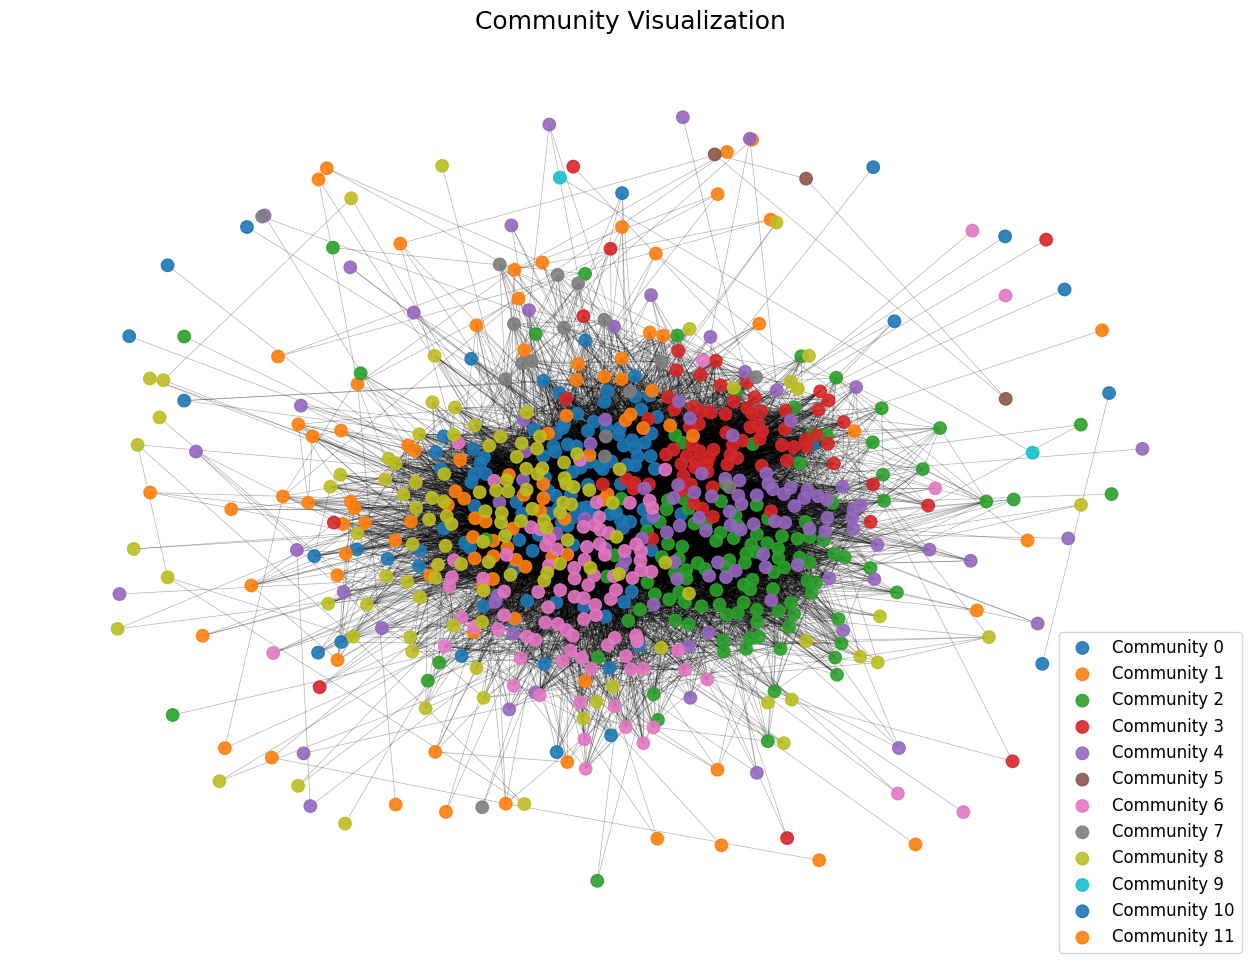

In [31]:
network_file = "Caltech36.gml" 
attribute = "major_index"  

graph_path = os.path.join(data, network_file)
graph = load_graph(graph_path)

partition = detect_communities(graph)

community_major_counts = analyze_communities(graph, partition, attribute)
for community_id, major_counts in community_major_counts.items():
    print(f"Community {community_id}:")
    for major, count in major_counts.items():
        print(f"  Major {major}: {count} students")

plot_communities(graph, partition, attribute)